In [47]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Читать изображение и изменять его размер

403 514


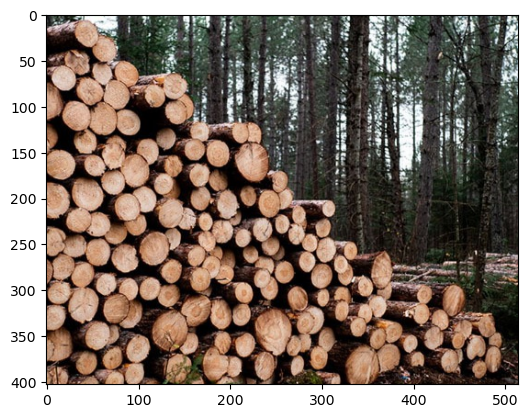

In [48]:
image = cv.imread(r"D:\Projects\Pycharm_projects\CV\lab02\task2\logs-4.jpg")
src = cv.cvtColor(image, cv.COLOR_BGR2RGB)
height, width = src.shape[:2]
new_height = int(height * 0.72)
src= cv.resize(src, (width, new_height), interpolation=cv.INTER_LINEAR)
plt.imshow(src)
height, width = src.shape[:2]
print(new_height, width)

# Преобразовать в черно-белое изображение

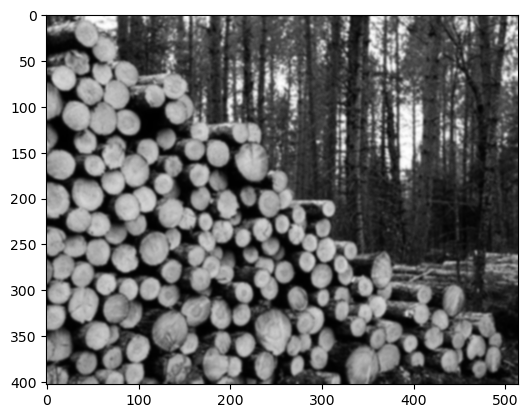

In [49]:
gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
gray = cv.GaussianBlur(gray, (5, 5), 0)
plt.imshow(gray , 'gray')
plt.show()


# Создавать маску (изображения)

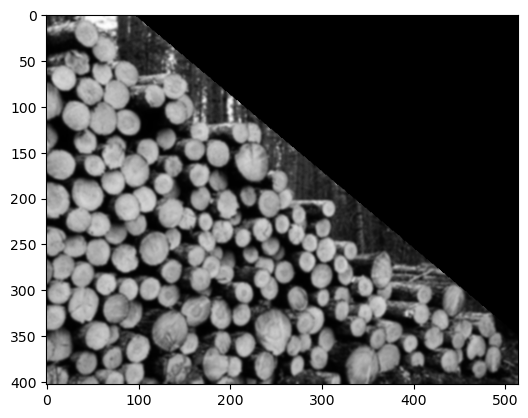

In [50]:
vertices = np.array([[0, 0], [95, 0], [514, 350], [514, 420], [0, 420]], dtype=np.int32)
mask = np.zeros_like(gray)
cv.fillConvexPoly(mask, vertices, 255)
masked = cv.bitwise_and(gray, gray, mask=mask)
plt.imshow(masked, 'gray')
plt.show()

# Использовать преобразование Хафа (HOUGH_GRADIENT_ALT) для обнаружения кругов на изображении

Total pipes:  117


(-0.5, 513.5, 402.5, -0.5)

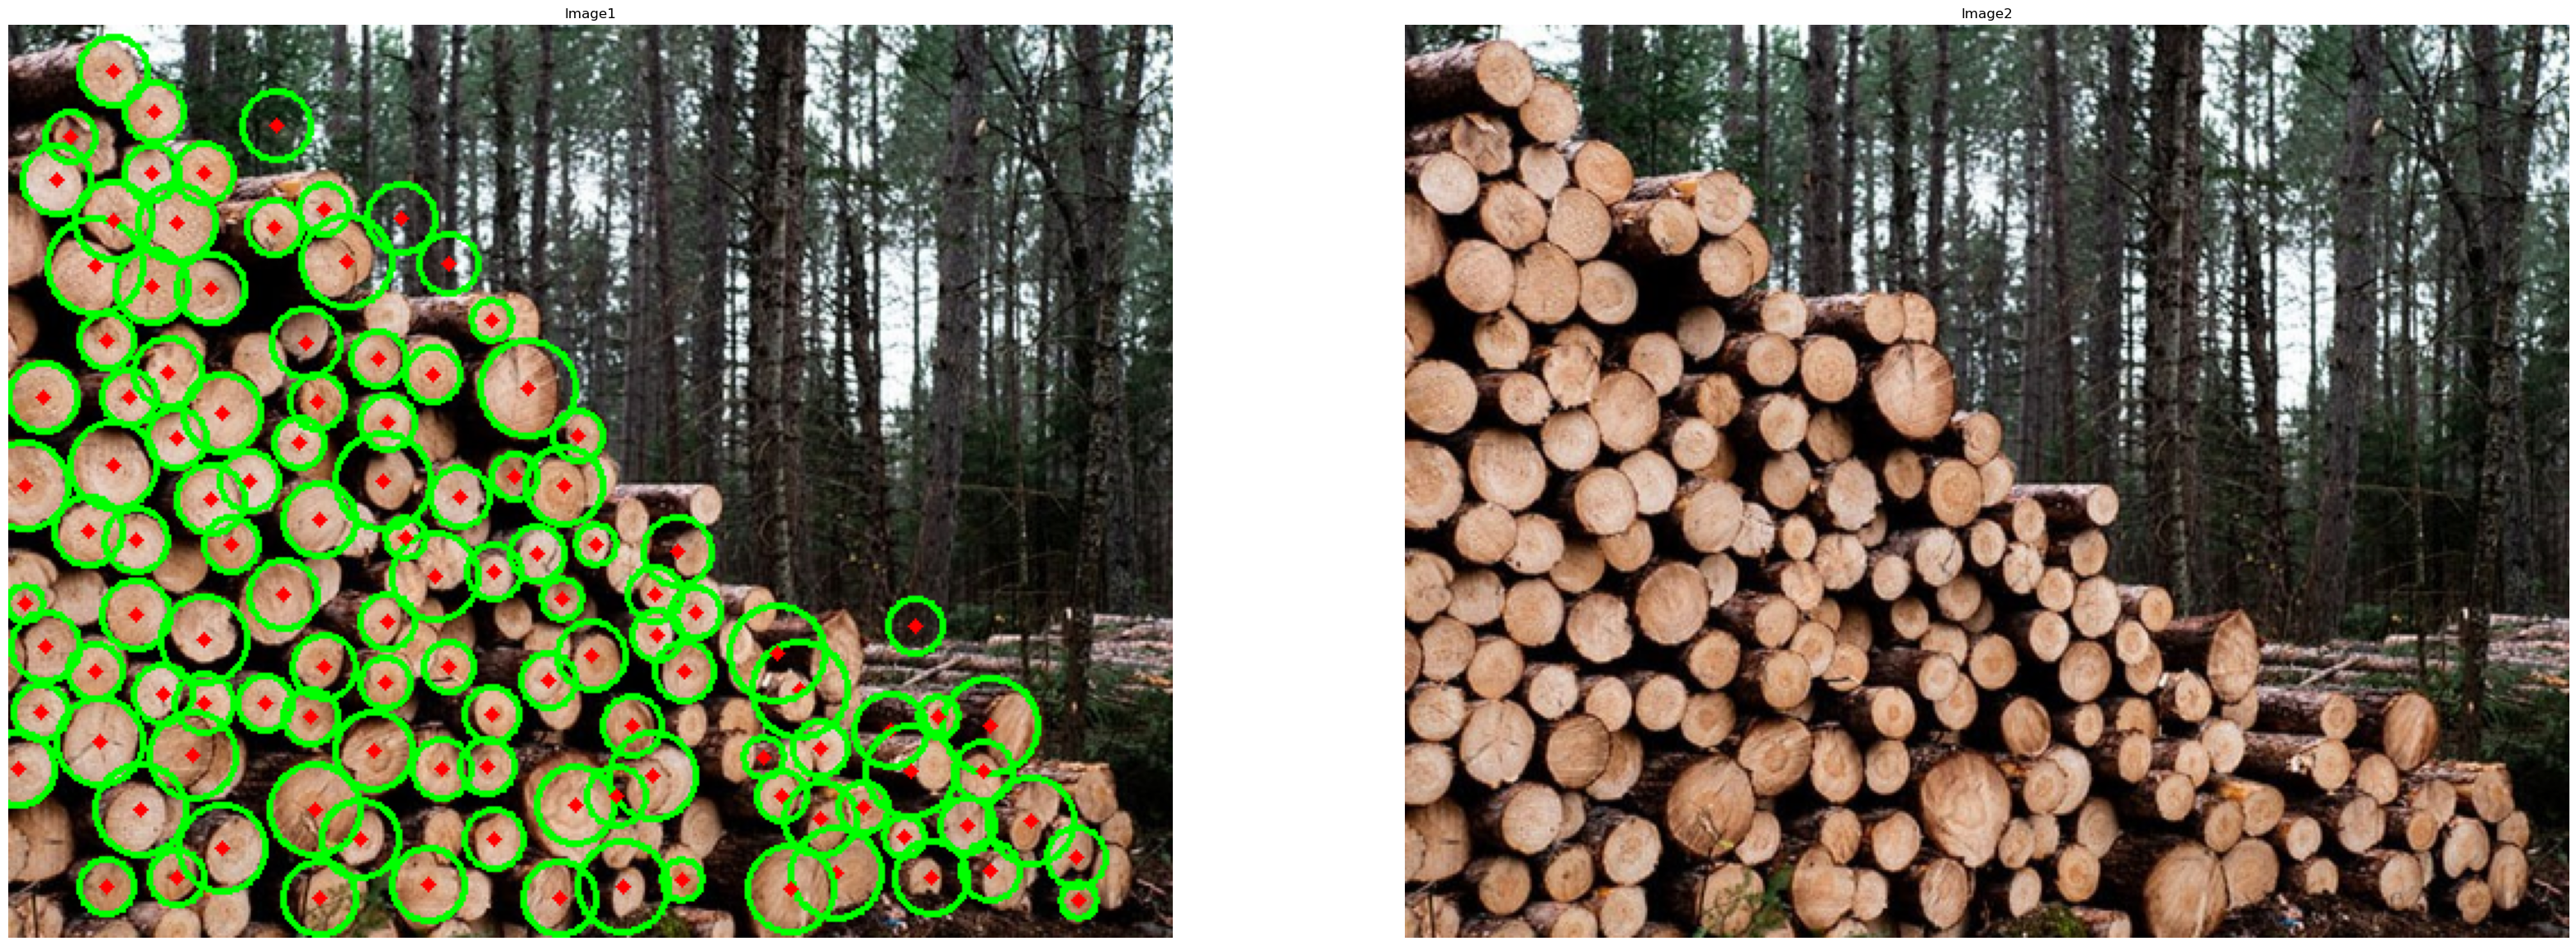

In [58]:
detected_circles = cv.HoughCircles(
    masked,
    cv.HOUGH_GRADIENT,
    1.2, 
    18, 
    param1=74,  
    param2=26,   
    minRadius=5, maxRadius=22
)

image = src.copy()
pipes_count = 0

if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))  # 将圆的数据转换为整数

    for points in detected_circles[0, :]:
        a, b, r = points[0] , points[1] , points[2]  

        cv.circle(image, (a, b), r, (0, 255, 0), 2)

        cv.circle(image, (a, b), 1, (255, 0, 0), 3)

        pipes_count += 1


print("Total pipes: ", pipes_count)

fig, axs = plt.subplots(1, 2, figsize=(40, 20))

axs[0].imshow(image)
axs[0].set_title('Image1')
axs[0].axis('off')  

axs[1].imshow(src)
axs[1].set_title('Image2')
axs[1].axis('off') 